#Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Loading and First Look of the data

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_result = pd.read_csv("gender_submission.csv")

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Data Analysis and Preprocessing

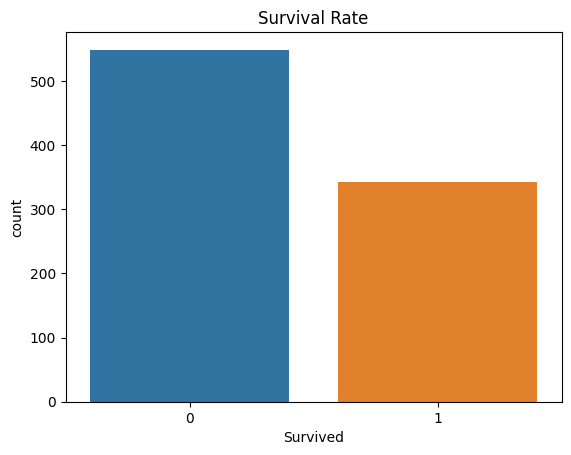

In [6]:
sns.countplot(x="Survived", data=df)
plt.title("Survival Rate")
plt.show()

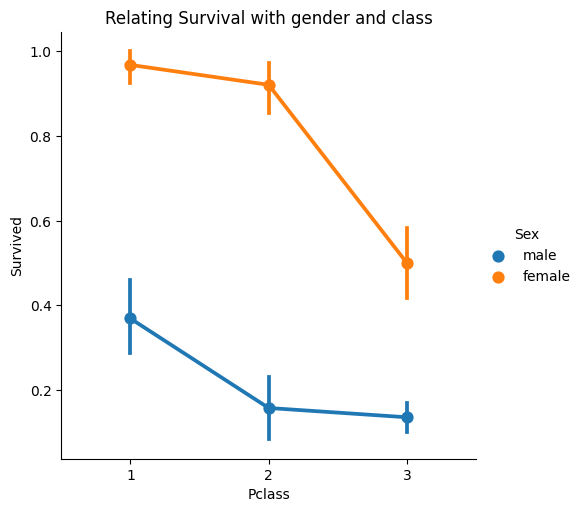

In [7]:
sns.catplot(data=df, x="Pclass", y="Survived", hue="Sex", kind="point")
plt.title("Relating Survival with gender and class")
plt.show()

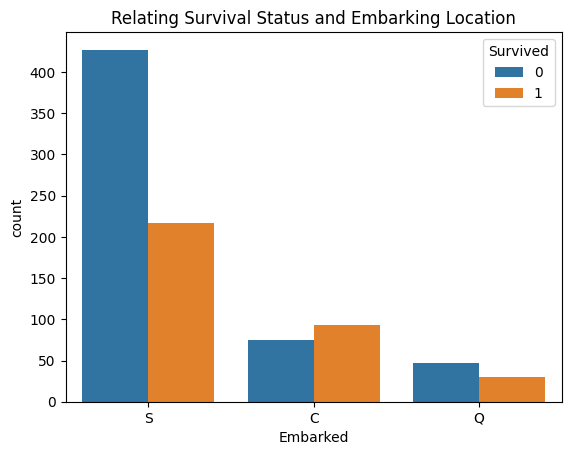

In [8]:
sns.countplot(data=df, x="Embarked", hue="Survived")
plt.title("Relating Survival Status and Embarking Location")
plt.show()

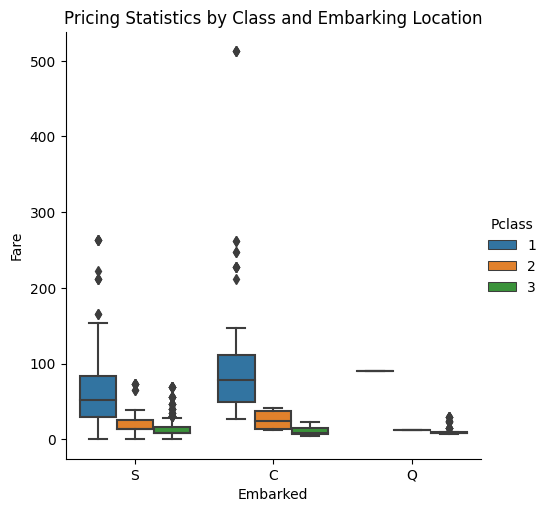

In [9]:
sns.catplot(data=df, x="Embarked", y="Fare", hue="Pclass", kind="box")
plt.title("Pricing Statistics by Class and Embarking Location")
plt.show()

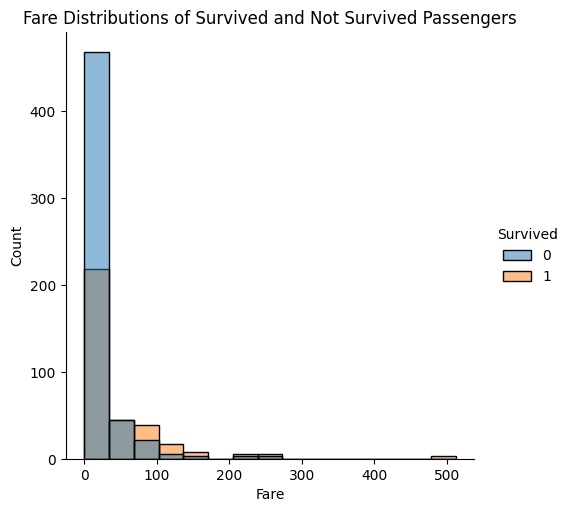

In [10]:
sns.displot(data=df, x="Fare", hue="Survived", bins=15)
plt.title("Fare Distributions of Survived and Not Survived Passengers")
plt.show()

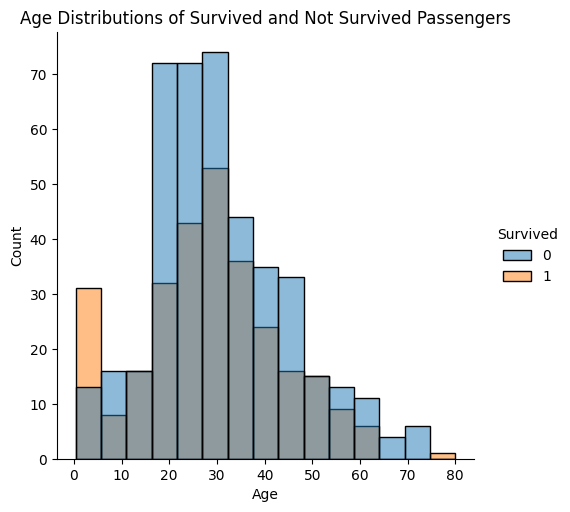

In [11]:
sns.displot(data=df, x="Age", hue="Survived", bins=15)
plt.title("Age Distributions of Survived and Not Survived Passengers")
plt.show()

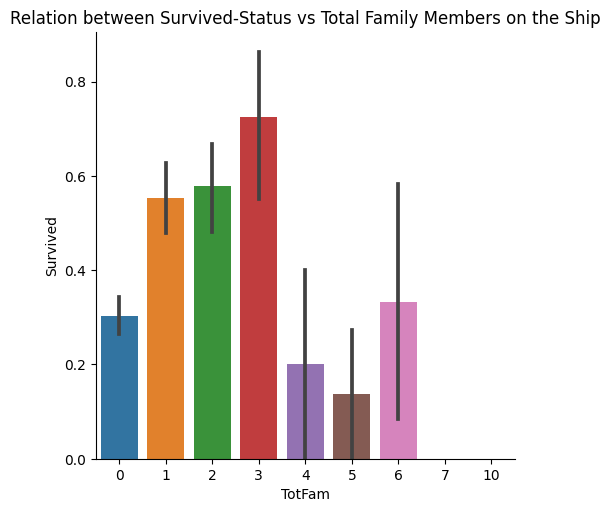

In [12]:
df["TotFam"] = df["SibSp"] + df["Parch"]
sns.catplot(data=df, x="TotFam", y="Survived", kind="bar")
plt.title("Relation between Survived-Status vs Total Family Members on the Ship")
plt.show()

In [13]:
df.drop(['TotFam'], axis = 1, inplace=True)

#Missing Values and Outliers


In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
from collections import Counter
def outlier_detection(data, features):
  outlier_indices = []
  for i in features:
    q1 = np.percentile(df[i], 25)
    q3 = np.percentile(df[i], 75)
    iqr = q3 - q1
    outlier_step = iqr*1.5
    outlier_list_col = df[(df[i] < q1 - outlier_step) | (df[i] > q3 + outlier_step)].index
    outlier_indices.extend(outlier_list_col)
  outlier_indices = Counter(outlier_indices)
  return outlier_indices

In [17]:
df = df.drop(outlier_detection(df,["Age", "SibSp", "Parch", "Fare"]), axis=0).reset_index(drop=True)

In [18]:
df['Age'] = df['Age'].fillna(df.groupby(['Pclass','SibSp','Parch'])['Age'].transform('mean'))
df.dropna(subset=['Embarked'], inplace = True)

In [19]:
df_test['Age'] = df_test['Age'].fillna(df_test.groupby(['Pclass','SibSp','Parch'])['Age'].transform('mean'))
df_test['Age'] = df_test['Age'].fillna(df_test.groupby('Pclass')['Age'].transform('mean'))
df_test['Fare'] = df_test['Fare'].fillna(df_test.groupby('Pclass')['Fare'].transform('mean'))

#Data Manipulation

In [20]:
df['Sex'] = df['Sex'].replace(['male', 'female'], [0, 1]).astype(int)
df_test['Sex'] = df_test['Sex'].replace(['male', 'female'], [0, 1]).astype(int)

In [21]:
df = pd.concat([df, pd.get_dummies(df['Embarked'])], axis = 1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Embarked'])], axis = 1)

In [22]:
df_num = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
df_test_num = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
df_result = df_result.drop(['PassengerId'], axis = 1)
x_train = df_num.iloc[:, 1:]
y_train = df_num.iloc[:, 0]
x_test = df_test_num.iloc[:,:]
y_test = df_result

#Visualing the Correlation Between Features

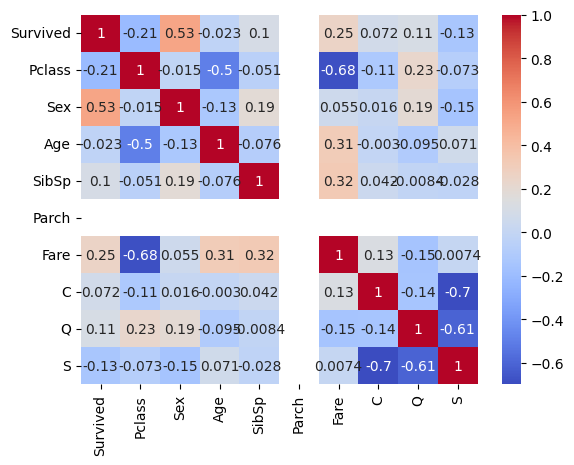

In [23]:
sns.heatmap(df_num.corr(), annot= True, cmap='coolwarm')
plt.show()

In [24]:
import statsmodels.regression.linear_model as sm

X = pd.DataFrame(np.append(arr = np.ones((607,1)).astype(int), values=x_train, axis=1))
X_2 = pd.DataFrame(np.append(arr = np.ones((418,1)).astype(int), values=x_test, axis=1))

X_train = X.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values
X_test = X_2.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     45.52
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           1.12e-51
Time:                        01:43:07   Log-Likelihood:                -255.17
No. Observations:                 607   AIC:                             526.3
Df Residuals:                     599   BIC:                             561.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3082      0.093      3.310      0.0

In [25]:
X_train = X.iloc[:,[0,1,2,3,4,5,6,7,8]].values
X_test = X_2.iloc[:,[0,1,2,3,4,5,6,7,8]].values
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     45.52
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           1.12e-51
Time:                        01:43:07   Log-Likelihood:                -255.17
No. Observations:                 607   AIC:                             526.3
Df Residuals:                     599   BIC:                             561.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3635      0.122      2.989      0.0

In [26]:
X_train = X.iloc[:,[0,1,2,3,4,5,6,8]].values
X_test = X_2.iloc[:,[0,1,2,3,4,5,6,8]].values
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     52.89
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           2.67e-52
Time:                        01:43:07   Log-Likelihood:                -255.78
No. Observations:                 607   AIC:                             525.6
Df Residuals:                     600   BIC:                             556.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3756      0.121      3.101      0.0

In [27]:
X_train = X.iloc[:,[0,1,2,3,4,5,6]].values
X_test = X_2.iloc[:,[0,1,2,3,4,5,6]].values
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     62.68
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           1.37e-52
Time:                        01:43:07   Log-Likelihood:                -257.27
No. Observations:                 607   AIC:                             526.5
Df Residuals:                     601   BIC:                             553.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3537      0.121      2.932      0.0

C:\Users\Arijit Ghosh\AppData\Roaming\Python\Python311\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [28]:
X_train = X.iloc[:,[0,1,2,3,5,6]].values
X_test = X_2.iloc[:,[0,1,2,3,5,6]].values
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     77.07
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           9.05e-53
Time:                        01:43:07   Log-Likelihood:                -259.13
No. Observations:                 607   AIC:                             528.3
Df Residuals:                     602   BIC:                             550.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3831      0.120      3.194      0.0

C:\Users\Arijit Ghosh\AppData\Roaming\Python\Python311\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [29]:
X_train = X.iloc[:,[0,1,2,5,6]].values
X_test = X_2.iloc[:,[0,1,2,5,6]].values
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     101.0
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           5.64e-53
Time:                        01:43:07   Log-Likelihood:                -261.08
No. Observations:                 607   AIC:                             530.2
Df Residuals:                     603   BIC:                             547.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2220      0.088      2.525      0.0

C:\Users\Arijit Ghosh\AppData\Roaming\Python\Python311\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


#Prediction Models

In [30]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

##Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=17, max_iter = 2000)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

acc_score = accuracy_score(y_test,y_pred)
print(round(acc_score * 100, 2))

91.87


In [32]:
X_train = X.iloc[:,[1,2,3,4,7,8,9]].values
X_test = X_2.iloc[:,[1,2,3,4,7,8,9]].values

##K Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

acc_score = accuracy_score(y_test,y_pred)
print(round(acc_score * 100, 2))

75.84


##Support Vector

In [34]:
from sklearn.svm import SVC
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

acc_score = accuracy_score(y_test,y_pred)
print(round(acc_score * 100, 2))

63.88


##Gaussian Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

acc_score = accuracy_score(y_test,y_pred)
print(round(acc_score * 100, 2))

85.65


##Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

acc_score = accuracy_score(y_test,y_pred)
print(round(acc_score * 100, 2))

81.58


##Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

acc_score = accuracy_score(y_test,y_pred)
print(round(acc_score * 100, 2))

75.36


#Improving the Model

In [38]:
from sklearn.model_selection import GridSearchCV
params = [{'solver':['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']}]

gs = GridSearchCV(estimator = logr,
                  param_grid = params,
                  scoring = 'accuracy',
                  cv = 15,
                  n_jobs = -1)

grid_search = gs.fit(X_train,y_train)
best_score = grid_search.best_score_
best_params = grid_search.best_params_

print(best_score)
print(best_params)

0.8104065040650408
{'solver': 'sag'}


In [39]:
params = [{'solver':['sag'], 'penalty':['l2', 'none']}]
gs = GridSearchCV(estimator = logr,
                  param_grid = params,
                  scoring = 'accuracy',
                  cv = 15,
                  n_jobs = -1,
                  error_score = 'raise')

grid_search = gs.fit(X_train,y_train)
best_score = grid_search.best_score_
best_params = grid_search.best_params_

print(best_score)
print(best_params)

0.8104065040650408
{'penalty': 'l2', 'solver': 'sag'}


In [40]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=17, solver="sag", penalty='l2', max_iter = 2000)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

#Accuracy Score

In [41]:
acc_score = accuracy_score(y_test,y_pred)
print(round(acc_score * 100, 2))

99.76


#Confusion Matrix

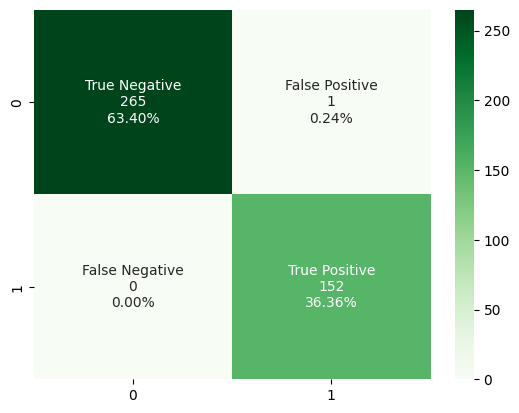

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
groups = ["True Negative","False Positive","False Negative","True Positive"]
counts = ["{0:0.0f}".format(i) for i in cm.flatten()]
percentages = ["{0:.2%}".format(j) for j in cm.flatten()/np.sum(cm)]
labels = [f"{x}\n{y}\n{z}" for x, y, z in zip(groups,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, fmt="", annot=labels, cmap="Greens")
plt.show()

#Submission

In [43]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)